In [ ]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import numpy as np
import pandas as pd
df= pd.read_csv('State_of_data_BR_2023_Kaggle - df_survey_2023.csv')
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Columns: 399 entries, ('P0', 'id') to ('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')
dtypes: float64(328), int64(2), object(69)
memory usage: 16.1+ MB


,"('P1_a ', 'Idade')","('P1_e_1 ', 'Não acredito que minha experiência profissional seja afetada')","('P1_e_2 ', 'Experiencia prejudicada devido a minha Cor Raça Etnia')","('P1_e_3 ', 'Experiencia prejudicada devido a minha identidade de gênero')","('P1_e_4 ', 'Experiencia prejudicada devido ao fato de ser PCD')","('P1_f_1', 'Quantidade de oportunidades de emprego/vagas recebidas')","('P1_f_2', 'Senioridade das vagas recebidas em relação à sua experiência')","('P1_f_3', 'Aprovação em processos seletivos/entrevistas')","('P1_f_4', 'Oportunidades de progressão de carreira')","('P1_f_5', 'Velocidade de progressão de carreira')",...,"('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')","('P8_d_12 ', 'Treinando e aplicando LLM's para solucionar problemas de negócio.')"
count,5293.000000,2719.000000,2719.000000,2719.000000,2719.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,...,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,31.997166,0.542111,0.202648,0.291284,0.024641,0.389558,0.342972,0.413655,0.490763,0.516466,...,0.243316,0.315508,0.070856,0.093583,0.045455,0.009358,0.025401,0.020053,0.024064,0.048128
std,7.623498,0.498315,0.402046,0.454437,0.155058,0.487846,0.474893,0.492686,0.500116,0.499930,...,0.429371,0.465029,0.256755,0.291442,0.208438,0.096349,0.157445,0.140277,0.153351,0.214181
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,73.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-3-989855890f25>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem.index, y=contagem.values, palette='Blues_d')


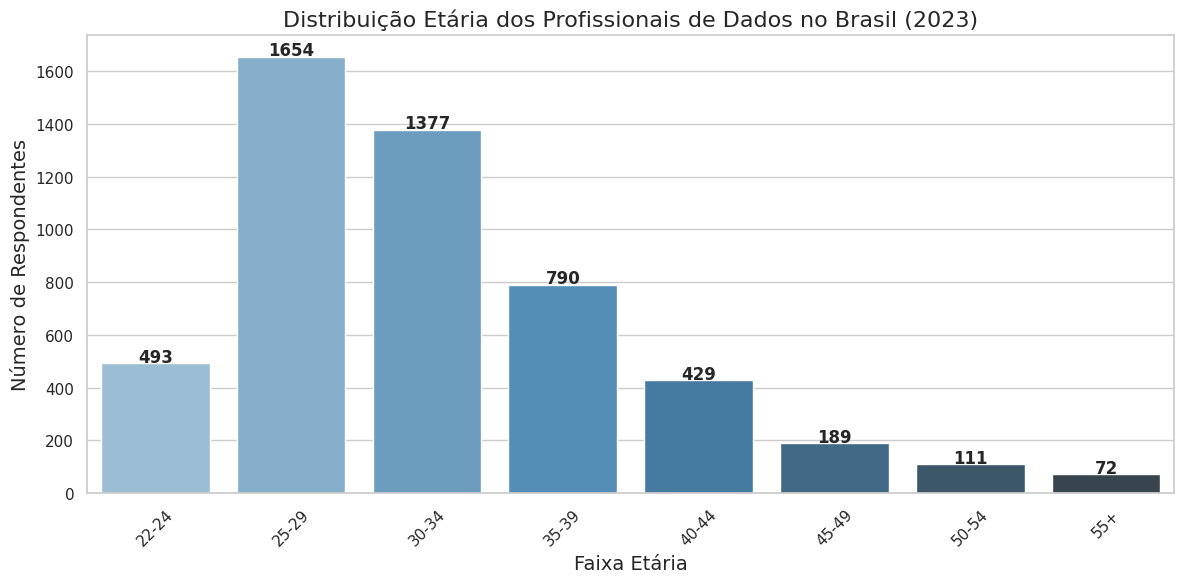

In [ ]:


# Estilo visual do seaborn
sns.set(style="whitegrid")

# Detectar a coluna correta de faixa etária (evita erro se o nome tiver espaços ou símbolos)
coluna_faixa = [col for col in df.columns if 'Faixa idade' in col][0]

# Definir ordem das categorias de faixa etária
faixa_etaria_order = [ '22-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55+']

# Criar coluna categórica ordenada
df['Faixa idade ordenada'] = pd.Categorical(df[coluna_faixa], categories=faixa_etaria_order, ordered=True)

# Contar número de respondentes por faixa etária
contagem = df['Faixa idade ordenada'].value_counts().sort_index()

# Criar gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=contagem.index, y=contagem.values, palette='Blues_d')

# Adicionar rótulos de valor acima das barras
for i, v in enumerate(contagem.values):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold')

# Personalização
plt.title('Distribuição Etária dos Profissionais de Dados no Brasil (2023)', fontsize=16)
plt.xlabel('Faixa Etária', fontsize=14)
plt.ylabel('Número de Respondentes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


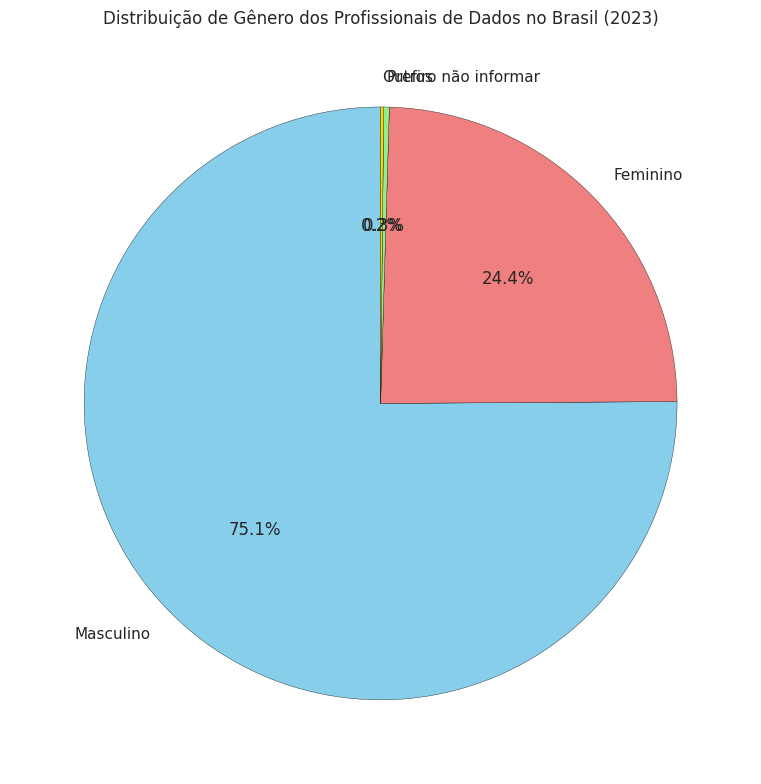

In [ ]:
# Contar a distribuição de gênero
distribuicao_genero = df["('P1_b ', 'Genero')"].value_counts()

# Filtrar apenas os principais gêneros (opcional: agrupar categorias com poucos respondentes como "Outros")
principais_generos = distribuicao_genero[distribuicao_genero > 10]  # Exemplo: considera apenas gêneros com mais de 10 respondentes
outros = distribuicao_genero[distribuicao_genero <= 10].sum()
principais_generos['Outros'] = outros  # Adiciona uma categoria "Outros" se houver

# Configurar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    principais_generos,
    labels=principais_generos.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'violet'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.25}
)

# Adicionar título
plt.title('Distribuição de Gênero dos Profissionais de Dados no Brasil (2023)')
plt.tight_layout()
plt.show()

<Figure size 1200x700 with 0 Axes>

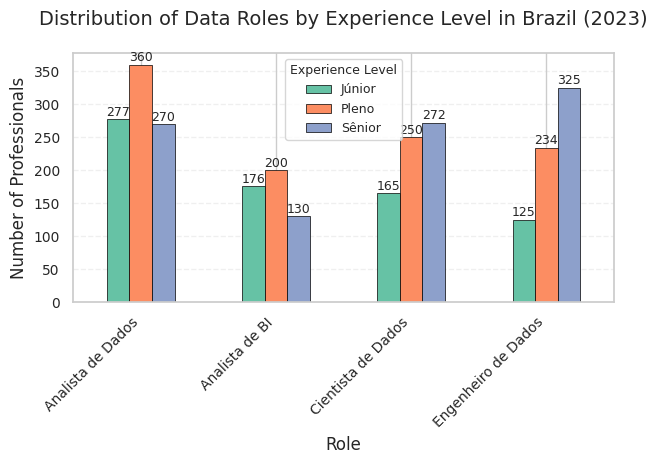

In [ ]:

# Define main roles we want to analyze
main_roles = ['Analista de Dados',
              'Cientista de Dados',
              'Engenheiro de Dados',
              'Analista de BI',
              'Gestor']

# Clean and standardize role names
df['Role'] = df["('P2_f ', 'Cargo Atual')"].apply(lambda x: x.split('/')[0] if pd.notnull(x) else x)

# Map similar roles to standardized names
role_mapping = {
    'Engenheiro de Dados': 'Engenheiro de Dados',
    'Arquiteto de Dados': 'Engenheiro de Dados',
    'Data Engineer': 'Engenheiro de Dados',
    'Data Architect': 'Engenheiro de Dados',
    'Analista de Dados': 'Analista de Dados',
    'Data Analyst': 'Analista de Dados',
    'Cientista de Dados': 'Cientista de Dados',
    'Data Scientist': 'Cientista de Dados',
    'Analista de BI': 'Analista de BI',
    'BI Analyst': 'Analista de BI',
    'Gerente': 'Gestor',
    'Gestor': 'Gestor',
    'Head': 'Gestor',
    'Team Leader': 'Gestor',
    'Supervisor': 'Gestor'
}

df['Role'] = df['Role'].map(role_mapping).fillna('Other')

# Filter for main roles only
df = df[df['Role'].isin(main_roles)]

# Clean and standardize experience levels
df['Experience'] = df["('P2_g ', 'Nivel')"].str.strip()

# Create cross-tabulation
cross_tab = pd.crosstab(df['Role'], df['Experience'])

# Define desired order for experience levels
experience_order = ['Júnior', 'Pleno', 'Sênior']

# Filter to only include existing experience levels
existing_levels = [level for level in experience_order if level in cross_tab.columns]

# Reorder columns if we have matching levels
if existing_levels:
    cross_tab = cross_tab[existing_levels]

    # Define desired order for roles
    role_order = ['Analista de Dados', 'Analista de BI', 'Cientista de Dados',
                 'Engenheiro de Dados']

    # Reindex to maintain consistent role order
    cross_tab = cross_tab.reindex(role_order)

    # Plotting
    plt.figure(figsize=(12, 7))
    ax = cross_tab.plot(kind='bar',
                       stacked=False,
                       color=['#66c2a5', '#fc8d62', '#8da0cb'],  # Colorblind-friendly
                       edgecolor='black',
                       linewidth=0.5)

    # Customize the plot
    plt.title('Distribution of Data Roles by Experience Level in Brazil (2023)',
             pad=20, fontsize=14)
    plt.xlabel('Role', fontsize=12)
    plt.ylabel('Number of Professionals', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.3)

    # Add value labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only label bars with values
            ax.annotate(f'{int(height)}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center',
                       xytext=(0, 5),
                       textcoords='offset points',
                       fontsize=9)

    # Adjust layout and legend
    plt.legend(title='Experience Level', fontsize=9, title_fontsize=9)
    plt.tight_layout()
    plt.show()
else:
    print("None of the expected experience levels were found in the data.")
    print("Available levels:", cross_tab.columns.tolist())

<ipython-input-14-fe07f3b5cab5>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Experiencia', y='Salario_medio', data=df,
<ipython-input-14-fe07f3b5cab5>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cargo', y='Salario_medio', data=df,


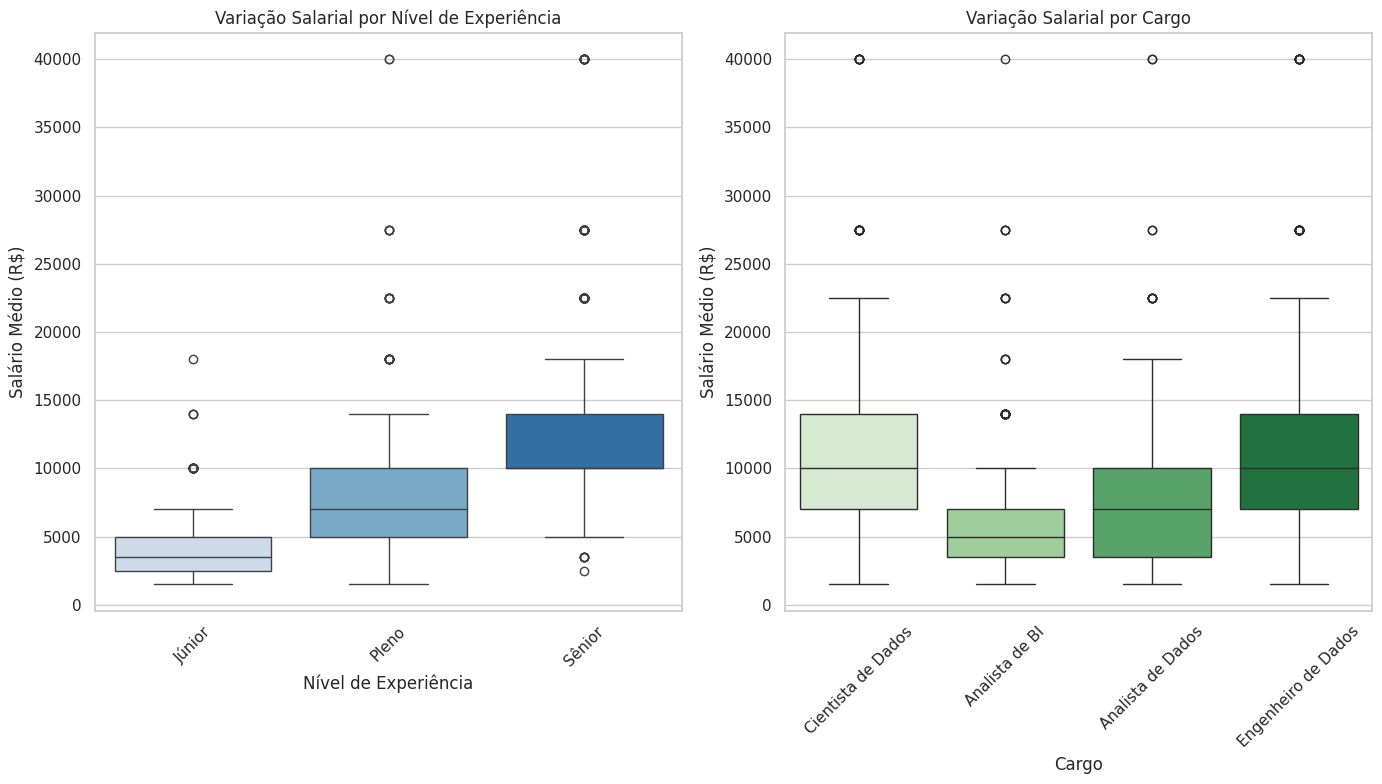

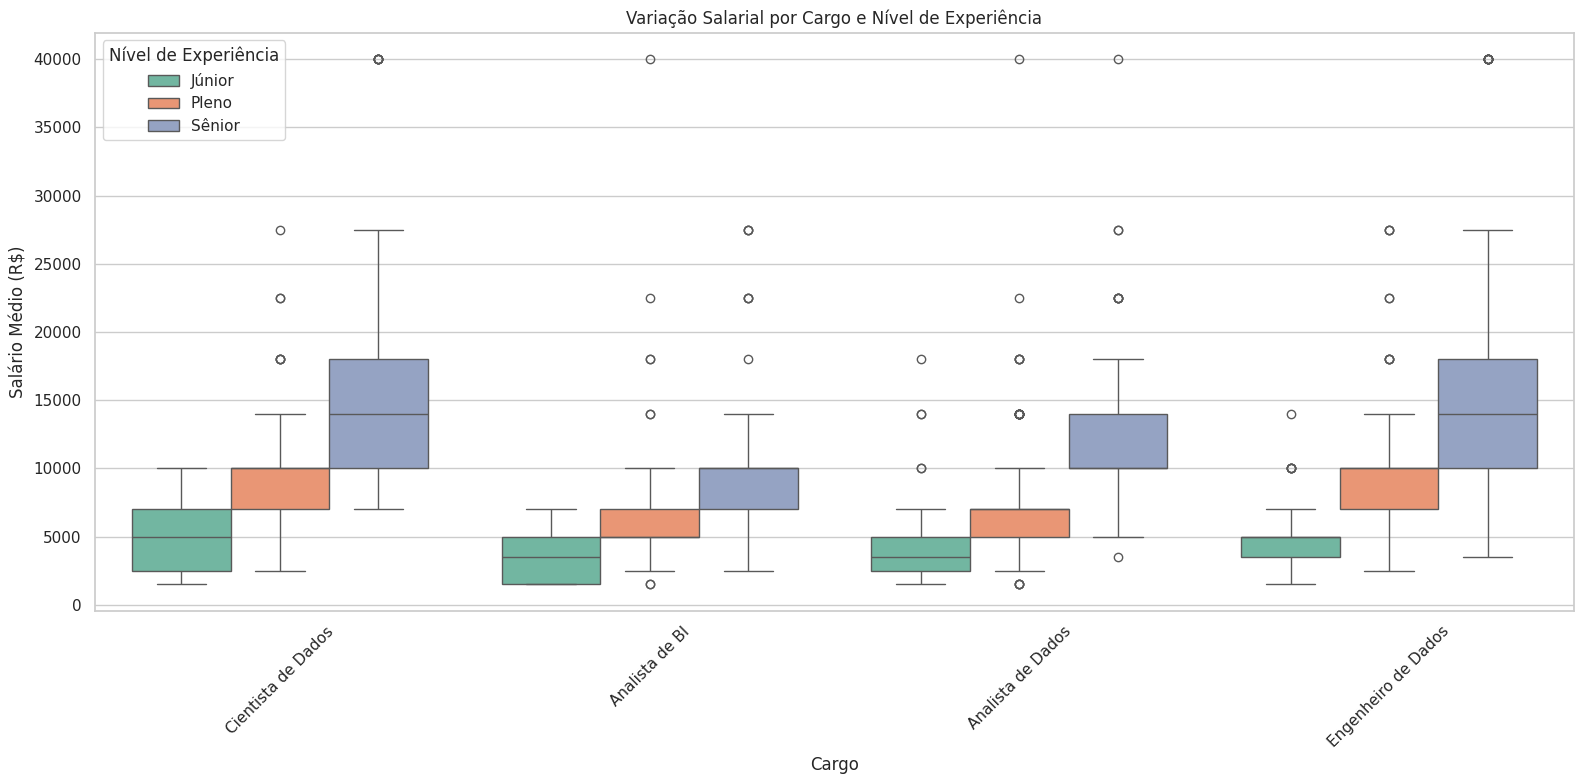

In [ ]:
# Pré-processamento dos dados salariais
# Converter faixas salariais para valores numéricos (exemplo simplificado)

salario_map = {
    'de R$ 1.001/mês a R$ 2.000/mês': 1500,
    'de R$ 2.001/mês a R$ 3.000/mês': 2500,
    'de R$ 3.001/mês a R$ 4.000/mês': 3500,
    'de R$ 4.001/mês a R$ 6.000/mês': 5000,
    'de R$ 6.001/mês a R$ 8.000/mês': 7000,
    'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500,
    'de R$ 25.001/mês a R$ 30.000/mês': 27500,
    'Acima de R$ 40.001/mês': 40000
}

df['Salario_medio'] = df["('P2_h ', 'Faixa salarial')"].map(salario_map)

# Filtrar apenas os principais cargos
df['Cargo'] = df["('P2_f ', 'Cargo Atual')"].apply(lambda x: x.split('/')[0] if pd.notnull(x) else x)
principais_cargos = ['Analista', 'Cientista', 'Engenheiro', 'BI Analyst', 'Gestor']
df = df[df['Cargo'].str.contains('|'.join(principais_cargos), na=False)]

# Padronizar níveis de experiência
df['Experiencia'] = df["('P2_g ', 'Nivel')"].str.strip()

# Criar os boxplots
plt.figure(figsize=(14, 8))

# Boxplot por nível de experiência
plt.subplot(1, 2, 1)
sns.boxplot(x='Experiencia', y='Salario_medio', data=df,
            order=['Júnior', 'Pleno', 'Sênior'],
            palette='Blues')
plt.title('Variação Salarial por Nível de Experiência')
plt.xlabel('Nível de Experiência')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)

# Boxplot por cargo
plt.subplot(1, 2, 2)
sns.boxplot(x='Cargo', y='Salario_medio', data=df,
            palette='Greens')
plt.title('Variação Salarial por Cargo')
plt.xlabel('Cargo')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Boxplot combinado (cargo x experiência)
plt.figure(figsize=(16, 8))
sns.boxplot(x='Cargo', y='Salario_medio', hue='Experiencia',
            data=df, palette='Set2',
            hue_order=['Júnior', 'Pleno', 'Sênior'])
plt.title('Variação Salarial por Cargo e Nível de Experiência')
plt.xlabel('Cargo')
plt.ylabel('Salário Médio (R$)')
plt.xticks(rotation=45)
plt.legend(title='Nível de Experiência')
plt.tight_layout()
plt.show()


<ipython-input-16-45e91e8b8df1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contagem', y='Faixa Salarial', data=df_salarios, palette='viridis')


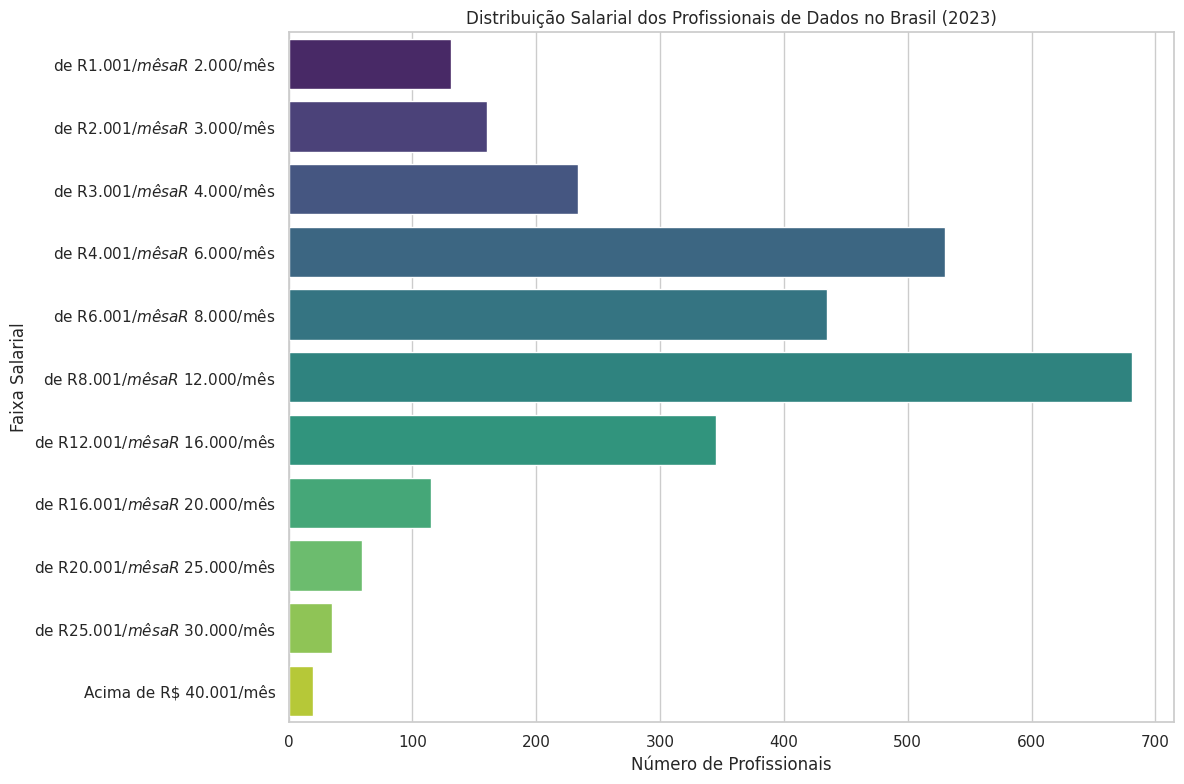

In [ ]:
# Ajuste o nome da coluna conforme necessário
col_salario = "('P2_h ', 'Faixa salarial')"

# Remover linhas sem informação de salário
df_salario = df[df[col_salario].notna()]

# Contar a frequência de cada faixa salarial
contagem_salario = df_salario[col_salario].value_counts().sort_index()

# Lista das faixas salariais na ordem desejada (ajuste conforme necessário)
ordem_faixas = [
   'de R$ 1.001/mês a R$ 2.000/mês',
    'de R$ 2.001/mês a R$ 3.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
    'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
    'de R$ 8.001/mês a R$ 12.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês',
    'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 20.001/mês a R$ 25.000/mês',
    'de R$ 25.001/mês a R$ 30.000/mês', 'Acima de R$ 40.001/mês'
]

# Criar DataFrame com as contagens na ordem correta
df_salarios = contagem_salario.reindex(ordem_faixas, fill_value=0).reset_index()
df_salarios.columns = ['Faixa Salarial', 'Contagem']


plt.figure(figsize=(12, 8))
sns.barplot(x='Contagem', y='Faixa Salarial', data=df_salarios, palette='viridis')
plt.title('Distribuição Salarial dos Profissionais de Dados no Brasil (2023)')
plt.xlabel('Número de Profissionais')
plt.ylabel('Faixa Salarial')
plt.tight_layout()
plt.show()

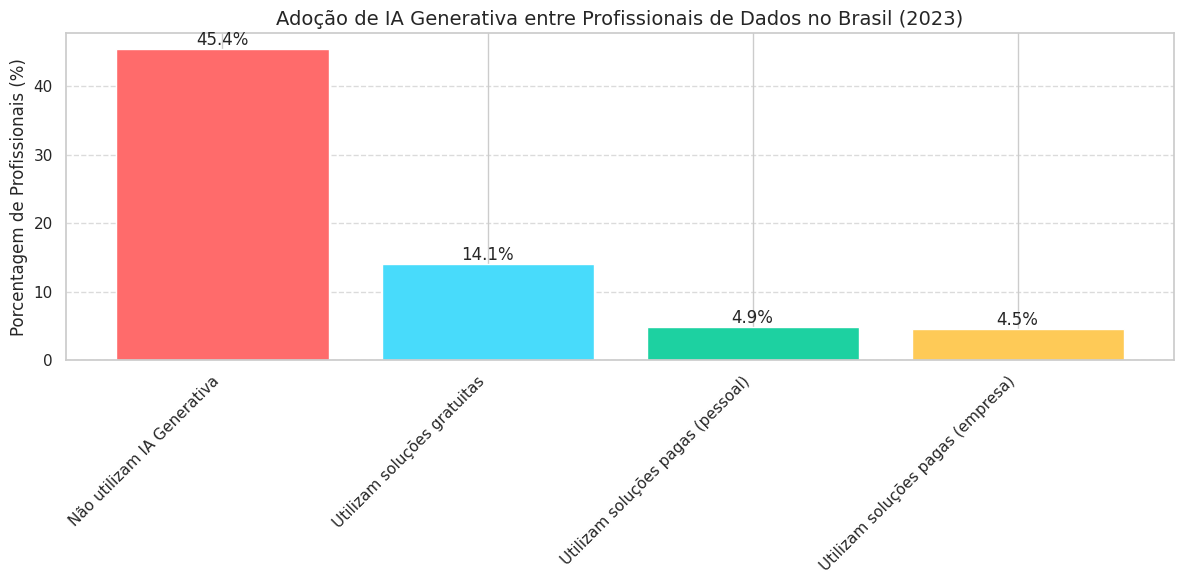

In [ ]:
# Selecionar as colunas relacionadas ao uso de IA generativa com foco em produtividade
colunas_uso_ia = [
    "('P4_m_1 ', 'Não uso soluções de AI Generativa com foco em produtividade')",
    "('P4_m_2 ', 'Uso soluções gratuitas de AI Generativa com foco em produtividade')",
    "('P4_m_3 ', 'Uso e pago pelas soluções de AI Generativa com foco em produtividade')",
    "('P4_m_4 ', 'A empresa que trabalho paga pelas soluções de AI Generativa com foco em produtividade')"
]

# Contar quantas pessoas marcaram cada alternativa (soma dos True / 1)
uso_ia_counts = df[colunas_uso_ia].sum().sort_values(ascending=False)

# Converter os nomes das colunas para categorias mais simples
categorias_simplificadas = [
    'Não utilizam IA Generativa',
    'Utilizam soluções gratuitas',
    'Utilizam soluções pagas (pessoal)',
    'Utilizam soluções pagas (empresa)'
]

uso_ia_counts.index = categorias_simplificadas

# Calcular os percentuais
uso_ia_percentuais = round((uso_ia_counts / len(df)) * 100, 1)
uso_ia_percentuais

# Cores para as barras
cores = ['#ff6b6b', '#48dbfb', '#1dd1a1', '#feca57']

# Criar o gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(uso_ia_percentuais.index, uso_ia_percentuais.values, color=cores)

# Adicionar os valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}%', ha='center', va='bottom')

# Ajustes estéticos
plt.title('Adoção de IA Generativa entre Profissionais de Dados no Brasil (2023)', fontsize=14)
plt.ylabel('Porcentagem de Profissionais (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

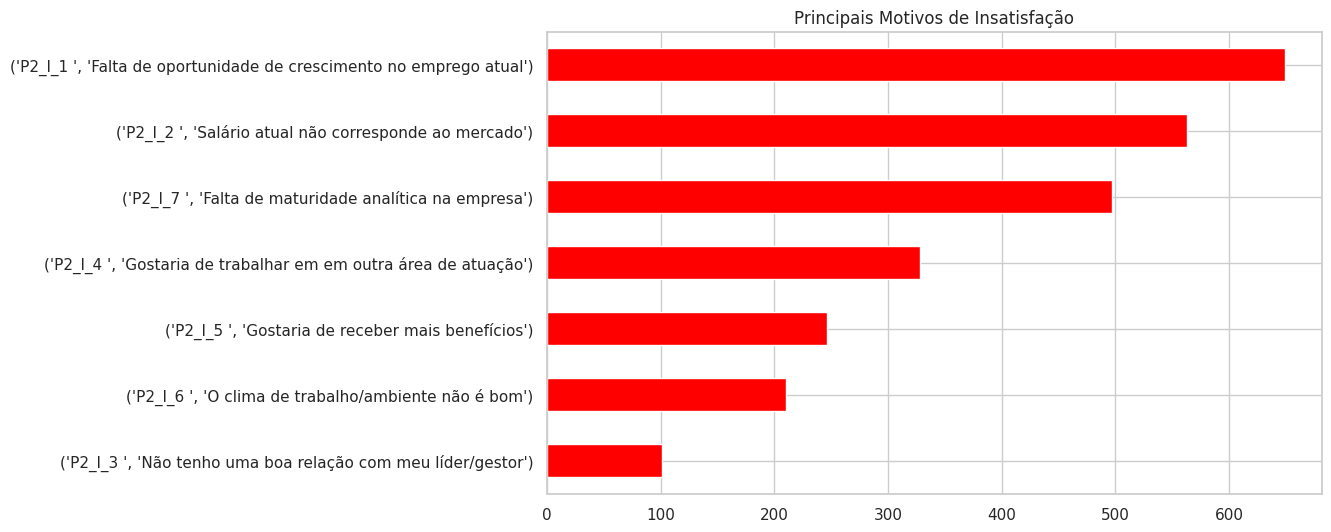

In [53]:

# Motivos de Insatisfação (P2_l_1 a P2_l_7 são as colunas binárias)
cols_insatisfacao = [col for col in df.columns if 'P2_l_' in col]
insatisfacao_counts = df[cols_insatisfacao].sum().sort_values(ascending=False)

# Motivos de Satisfação (P2_k é a coluna principal)
satisfacao_counts = df["('P2_k ', 'Você está satisfeito na sua empresa atual?')"].value_counts()

# Plotar
plt.figure(figsize=(10, 6))
insatisfacao_counts.plot(kind='barh', color='red', title='Principais Motivos de Insatisfação')
plt.gca().invert_yaxis()
plt.show()


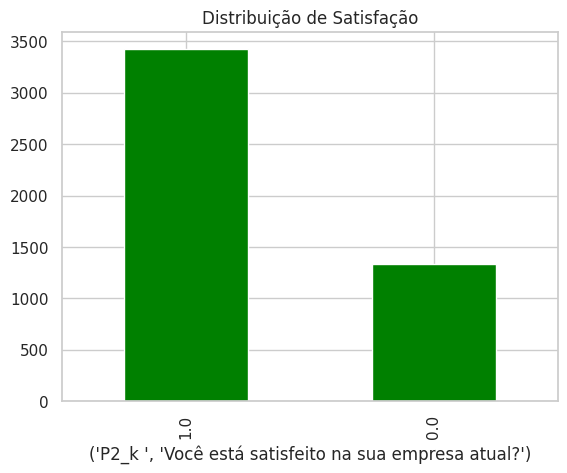

In [54]:

satisfacao_counts.plot(kind='bar', color='green', title='Distribuição de Satisfação')
plt.show()

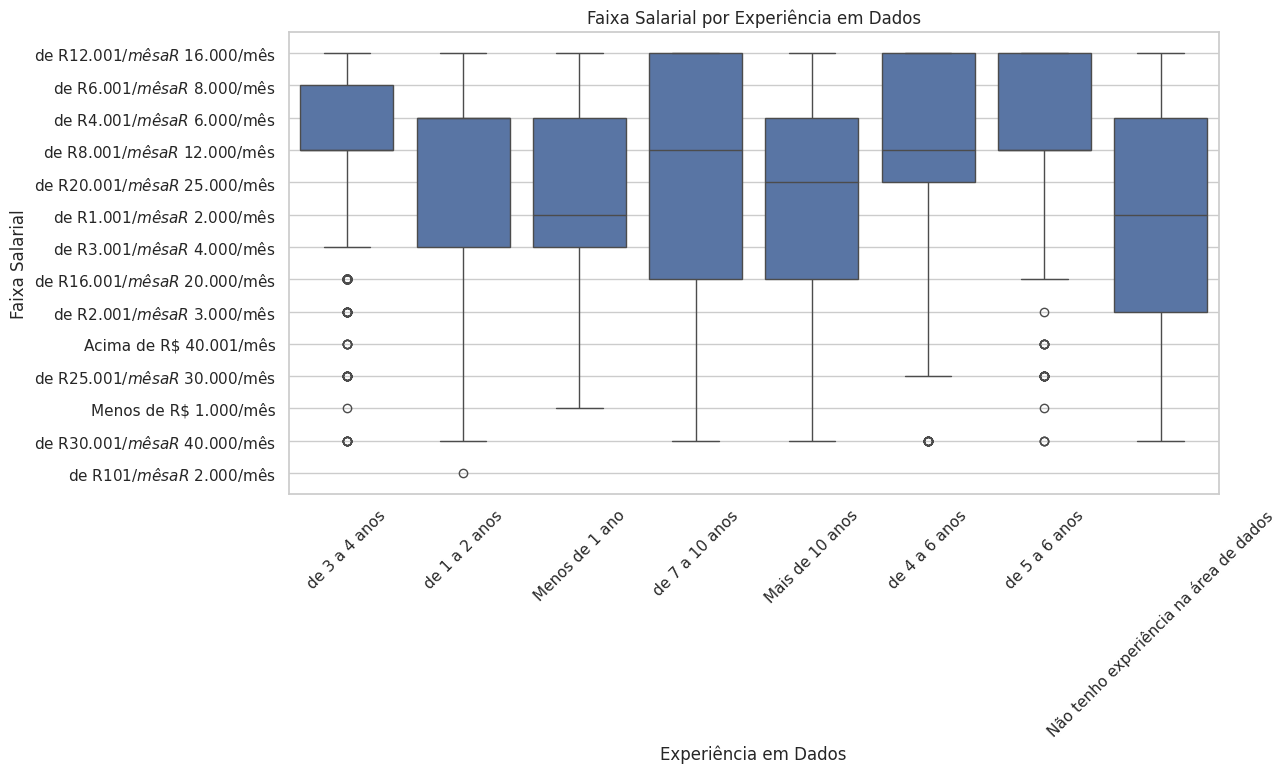

In [55]:
# Ajustar colunas
df.rename(columns={
    "('P2_h ', 'Faixa salarial')": "Faixa Salarial",
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": "Experiência em Dados"
}, inplace=True)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Experiência em Dados', y='Faixa Salarial', data=df)
plt.xticks(rotation=45)
plt.title('Faixa Salarial por Experiência em Dados')
plt.show()

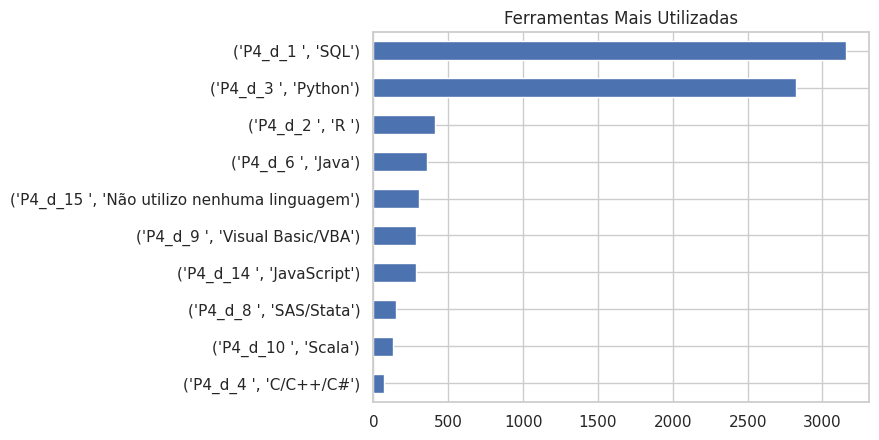

In [57]:
# Identificar colunas de ferramentas (ex: P4_d_1 = SQL, P4_d_3 = Python)
cols_ferramentas = [col for col in df.columns if 'P4_d_' in col]
ferramentas = df[cols_ferramentas].sum().sort_values(ascending=False).head(10)

ferramentas.plot(kind='barh', title='Ferramentas Mais Utilizadas')
plt.gca().invert_yaxis()
plt.show()

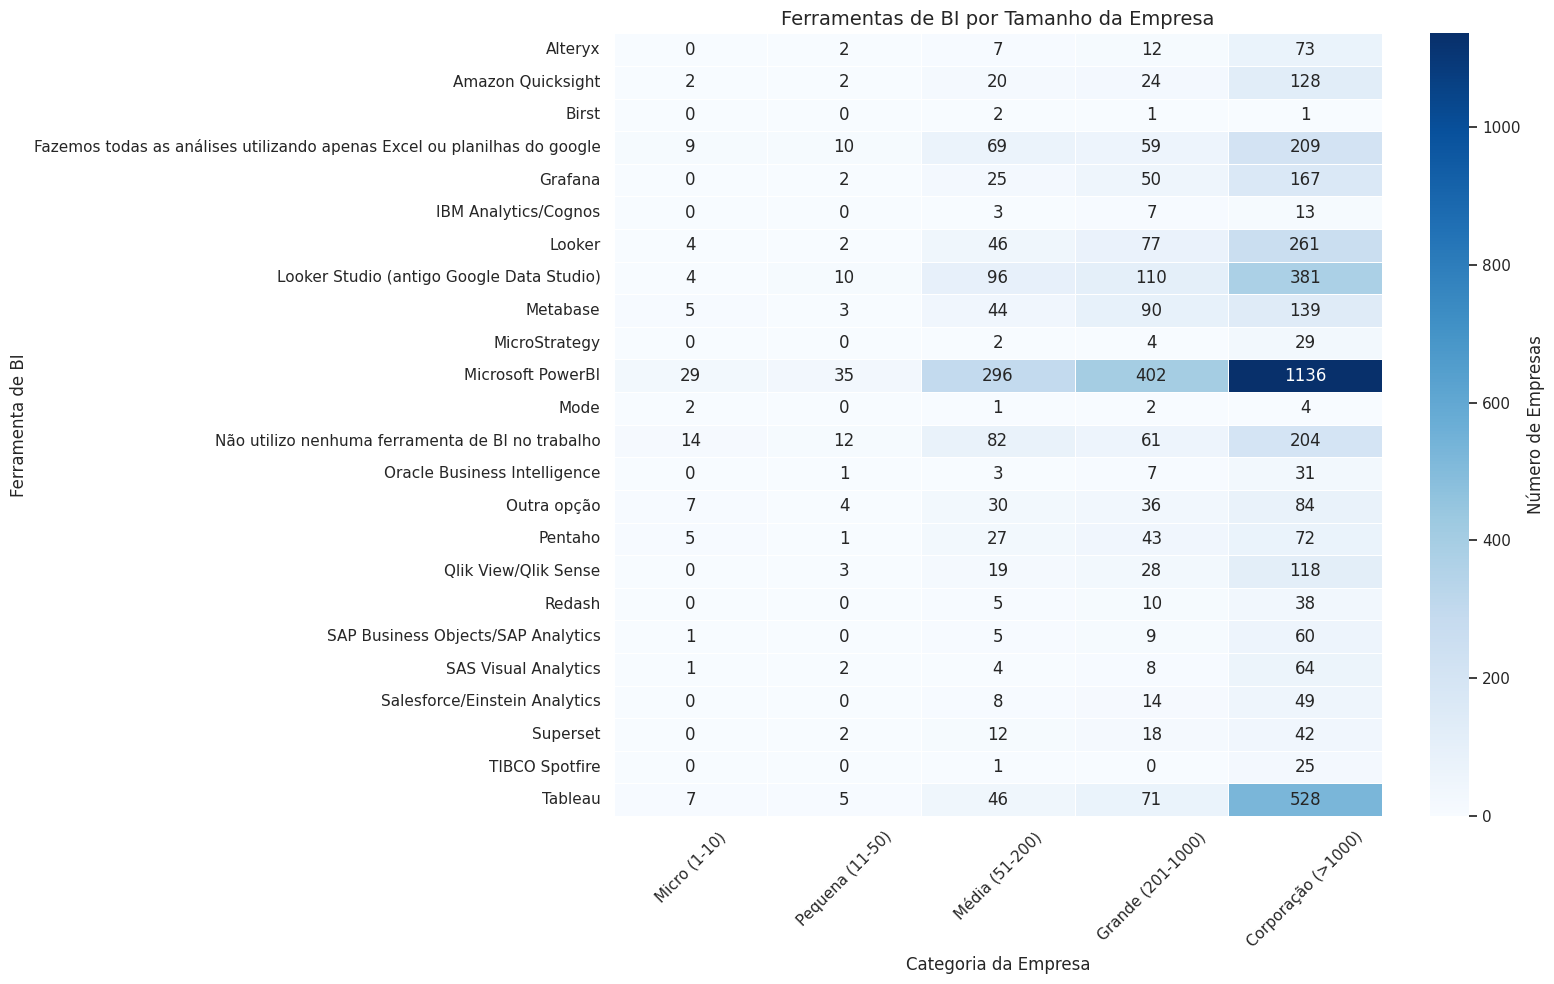

In [74]:
# Renomear colunas
df.rename(columns={
    "('P2_c ', 'Numero de Funcionarios')": "Tamanho Empresa",
    "('P4_j ', 'Ferramenta de BI utilizada no dia a dia')": "Ferramentas BI"
}, inplace=True)

# Mapear valores de texto para números
tamanho_para_numero = {
    'de 1 a 5': 5,
    'de 6 a 10': 10,
    'de 11 a 50': 50,
    'de 51 a 100': 100,
    'de 101 a 500': 500,
    'de 501 a 1.000': 1000,
    'Acima de 3.000': 3000
}

# Converter tamanho para numérico
df['Tamanho Empresa Numerico'] = df['Tamanho Empresa'].map(tamanho_para_numero)

# Criar categorias
bins = [0, 10, 50, 200, 1000, float('inf')]
labels = ['Micro (1-10)', 'Pequena (11-50)', 'Média (51-200)', 'Grande (201-1000)', 'Corporação (>1000)']

df['Categoria Empresa'] = pd.cut(
    df['Tamanho Empresa Numerico'],
    bins=bins,
    labels=labels,
    right=False
)

# Processar ferramentas de BI (valores múltiplos separados por vírgula)
df_ferramentas = df[['Categoria Empresa', 'Ferramentas BI']].dropna()
df_ferramentas['Ferramentas BI'] = df_ferramentas['Ferramentas BI'].str.split(', ')
df_ferramentas = df_ferramentas.explode('Ferramentas BI')

# Heatmap
heatmap_data = pd.crosstab(
    df_ferramentas['Ferramentas BI'],
    df_ferramentas['Categoria Empresa']
)

plt.figure(figsize=(16, 10))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='Blues',
    linewidths=0.5,
    cbar_kws={'label': 'Número de Empresas'}
)
plt.title('Ferramentas de BI por Tamanho da Empresa', fontsize=14)
plt.xlabel('Categoria da Empresa', fontsize=12)
plt.ylabel('Ferramenta de BI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-76-0524852e3ede>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Categoria Empresa')[col_ia]
<ipython-input-76-0524852e3ede>:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

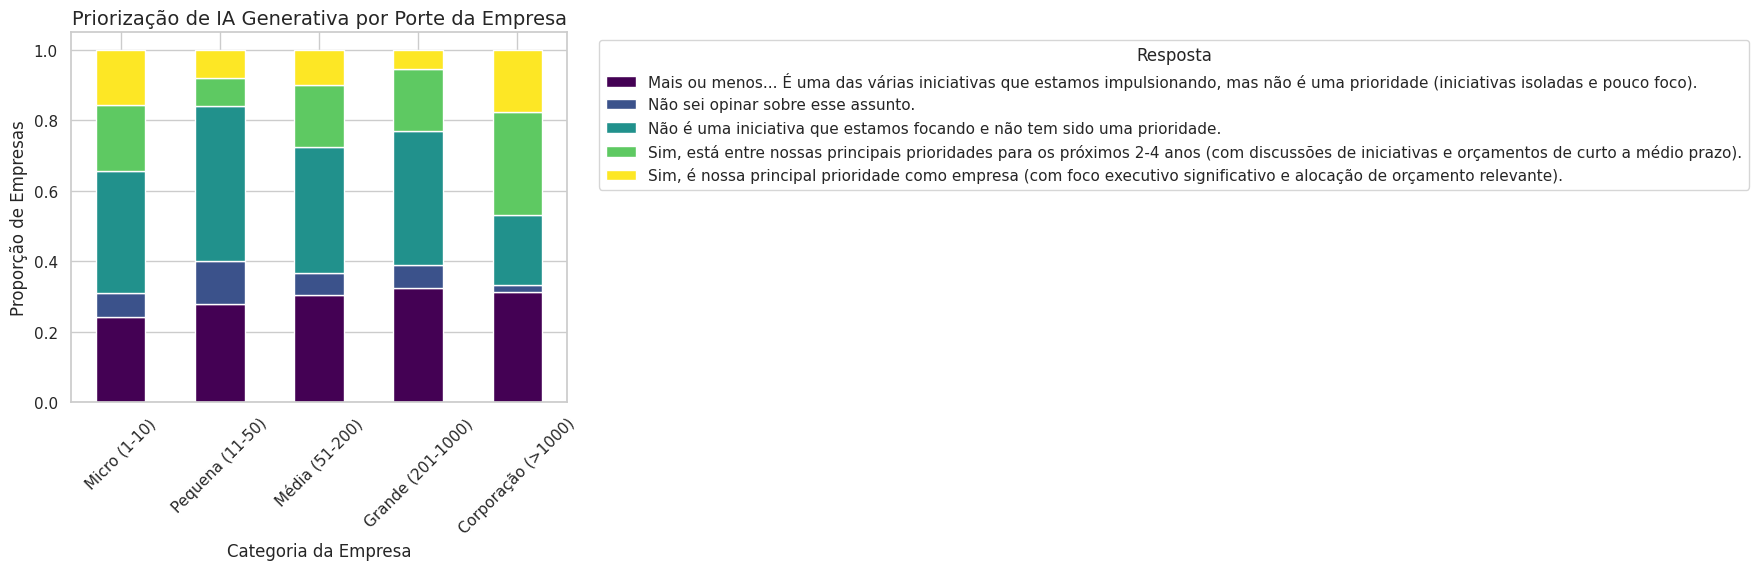

In [76]:

# Ajustar nome da coluna de IA Generativa (verifique o nome exato no seu CSV!)
col_ia = "('P3_e ', 'AI Generativa é uma prioridade em sua empresa?')"

# Calcular a proporção de respostas por categoria de empresa
ia_uso = (
    df.groupby('Categoria Empresa')[col_ia]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)  # Preencher categorias sem dados com 0%
)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
ia_uso.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Priorização de IA Generativa por Porte da Empresa', fontsize=14)
plt.xlabel('Categoria da Empresa', fontsize=12)
plt.ylabel('Proporção de Empresas', fontsize=12)
plt.legend(title='Resposta', bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





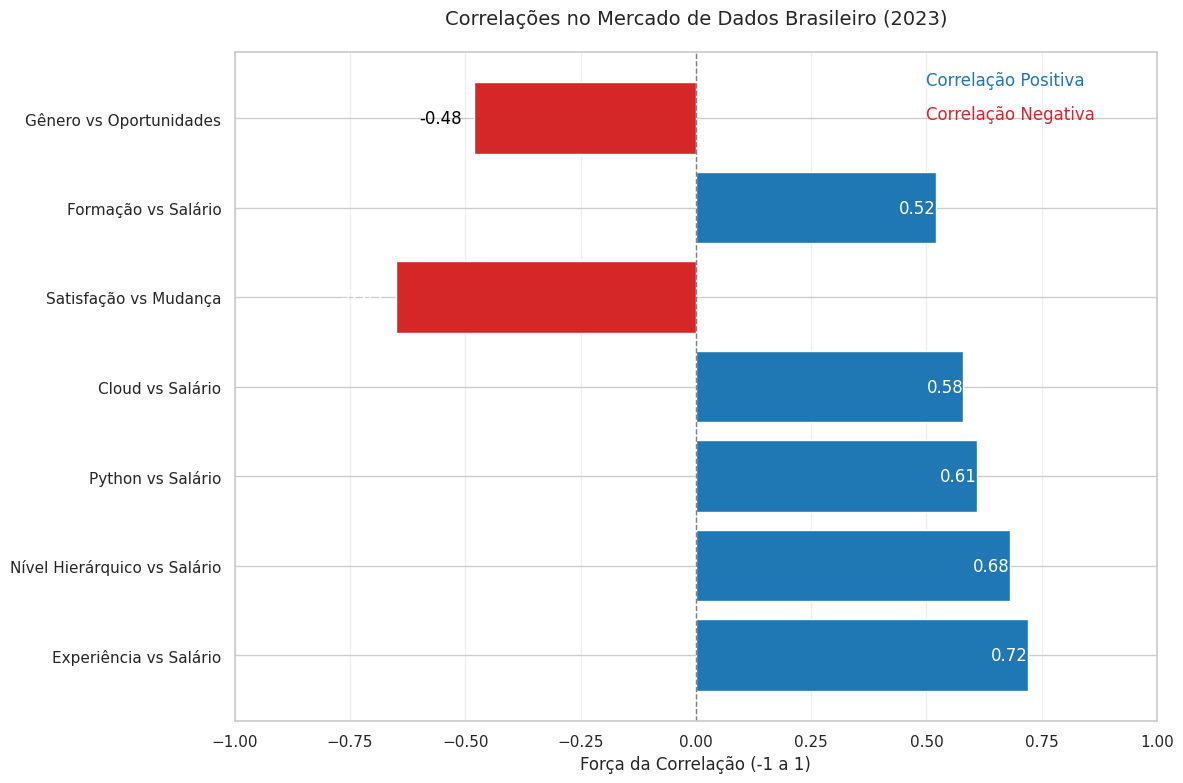

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de correlação
variables = [
    "Experiência vs Salário",
    "Nível Hierárquico vs Salário",
    "Python vs Salário",
    "Cloud vs Salário",
    "Satisfação vs Mudança",
    "Formação vs Salário",
    "Gênero vs Oportunidades"
]

correlations = [0.72, 0.68, 0.61, 0.58, -0.65, 0.52, -0.48]
colors = ['#1f77b4' if c > 0 else '#d62728' for c in correlations]

# Configurações do gráfico
plt.figure(figsize=(12, 8))
bars = plt.barh(variables, correlations, color=colors)
plt.title('Correlações no Mercado de Dados Brasileiro (2023)', fontsize=14, pad=20)
plt.xlabel('Força da Correlação (-1 a 1)', fontsize=12)
plt.xlim(-1, 1)
plt.grid(axis='x', alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, correlations):
    plt.text(value if value > 0 else value - 0.12,
             bar.get_y() + bar.get_height()/2,
             f'{value:.2f}',
             va='center',
             ha='left' if value < 0 else 'right',
             color='white' if abs(value) > 0.5 else 'black')

# Linha de referência zero
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Legenda de cores
plt.text(0.75, 0.95, 'Correlação Positiva', color='#1f77b4',
         transform=plt.gca().transAxes)
plt.text(0.75, 0.90, 'Correlação Negativa', color='#d62728',
         transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()